<!DOCTYPE html>
<html>
<head>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      margin: 0;
      padding: 20px;
    }
    h1 {
      color: #333;
    }
    h2 {
      color: #666;
    }
    p {
      color: #444;
    }
    ul {
      color: #555;
      margin: 0;
      padding-left: 20px;
    }
  </style>
</head>
<body>
  <h1>Análise e Previsão de Custos Médicos</h1>

  <a href="https://www.kaggle.com/datasets/nanditapore/medical-cost-dataset?resource=download" target="_blank">Dados: Medical Cost Dataset</a>
  
  <h2>Descrição do Conjunto de Dados</h2>
  <p>O dataset em análise foi retirado do Kaggle e examina os custos médicos e despesas de saúde. Esses dados têm a intenção de oferecer insights valiosos para entender os fatores que influenciam as cargas médicas no setor de saúde.</p>
  
  <ul>
    <li><strong>ID:</strong> Um identificador exclusivo atribuído a cada registro individual, facilitando o gerenciamento e análise eficiente de dados.</li>
    <li><strong>Age:</strong> A idade do paciente, fornecendo um fator demográfico crucial que muitas vezes se correlaciona com despesas médicas.</li>
    <li><strong>Sex:</strong> O gênero do paciente, oferecendo insights sobre possíveis variações de custos com base em diferenças biológicas.</li>
    <li><strong>BMI:</strong> Índice de Massa Corporal (IMC) do paciente, indicando o peso relativo e seu potencial impacto nos custos de saúde.</li>
    <li><strong>Filhos:</strong> Número de filhos ou dependentes cobertos pelo seguro médico, influenciando as despesas médicas familiares.</li>
    <li><strong>Fumante:</strong> Um indicador binário para saber se o paciente é fumante ou não, pois os hábitos de fumar podem impactar significativamente os custos de saúde.</li>
    <li><strong>Região:</strong> A região geográfica do paciente, ajudando a compreender as disparidades regionais nas despesas de saúde.</li>
    <li><strong>Despesas:</strong> As despesas médicas incorridas pelo paciente, servindo como variável alvo para análises e previsões.</li>
  </ul>
</body>
</html>


<h1> Importando as bibliotecas </h1>

In [133]:
#Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

<h1> 1. Carregando e Explorando os Dados: </h1>

In [134]:
# Carregar os dados
data = pd.read_csv("medical_cost.csv")

In [135]:
# Verificar as primeiras linhas do DataFrame
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [136]:
# Remover a coluna ID
data.drop('Id',axis=1,inplace = True)

In [137]:
# Informações sobre o DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [138]:
# Estatísticas descritivas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [139]:
# Verificar valores nulos/faltantes por coluna

valores_nulos = data.isnull().sum()
valores_nulos

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [140]:
# Visualizar valores únicos em cada coluna categórica
print("\nValores únicos em colunas categóricas:")
colunas_categoricas = data.select_dtypes(include=['object']).columns
for coluna in colunas_categoricas:
    valores_unicos = data[coluna].unique()
    print(f"{coluna}: {valores_unicos}")


Valores únicos em colunas categóricas:
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


<h1> 2. Análise Exploratória de Dados </h1>

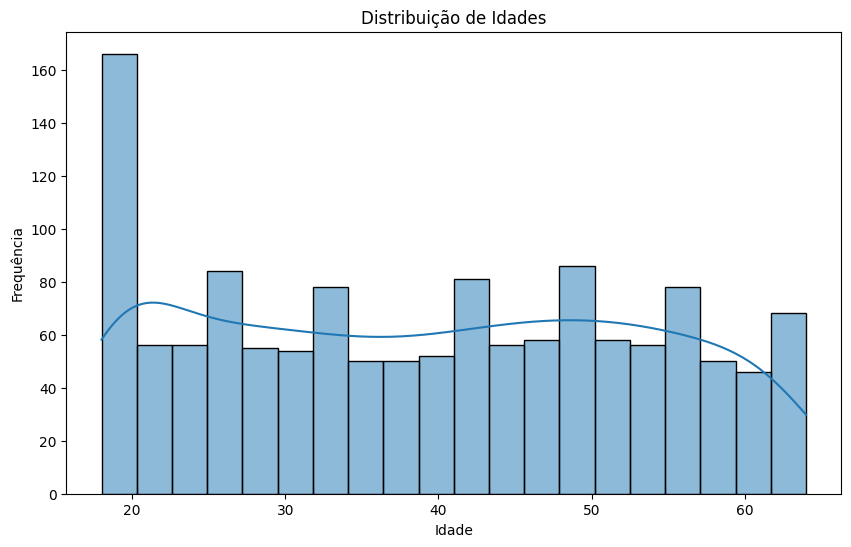

In [141]:
# Distribuição de idades
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [142]:
# Análise da distribuição de gênero
distribuicao_genero = data['sex'].value_counts()
print("\nDistribuição de Gênero:")
print(distribuicao_genero)

# Análise da distribuição de fumantes
distribuicao_fumante = data['smoker'].value_counts()
print("\nDistribuição de Fumantes:")
print(distribuicao_fumante)

# Análise da distribuição de regiões
distribuicao_regiao = data['region'].value_counts()
print("\nDistribuição de Regiões:")
print(distribuicao_regiao)


Distribuição de Gênero:
male      676
female    662
Name: sex, dtype: int64

Distribuição de Fumantes:
no     1064
yes     274
Name: smoker, dtype: int64

Distribuição de Regiões:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


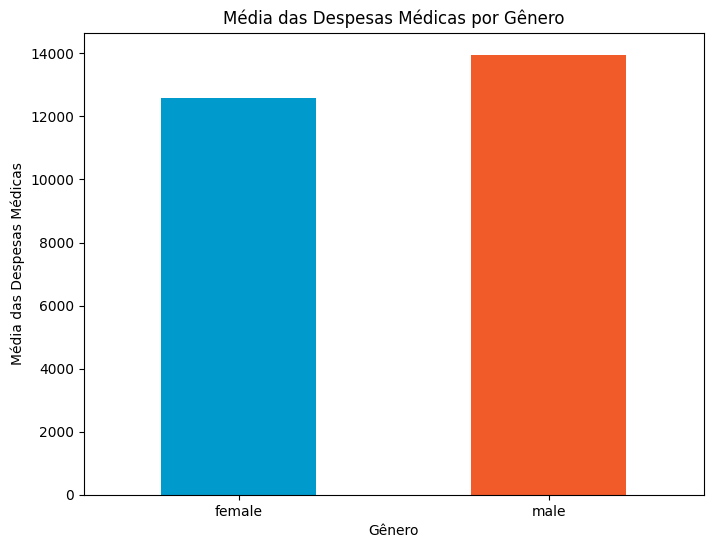

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [143]:
# Calcular médias das despesas por gênero
media_despesa_por_genero = data.groupby('sex')['charges'].mean()

#definir cores

cores = ['#009acd', '#f15a29']

# Gráfico de barras
plt.figure(figsize=(8, 6))
media_despesa_por_genero.plot(kind='bar', color=cores)
plt.title('Média das Despesas Médicas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média das Despesas Médicas')
plt.xticks(rotation=0)

plt.show()

media_despesa_por_genero.head() 

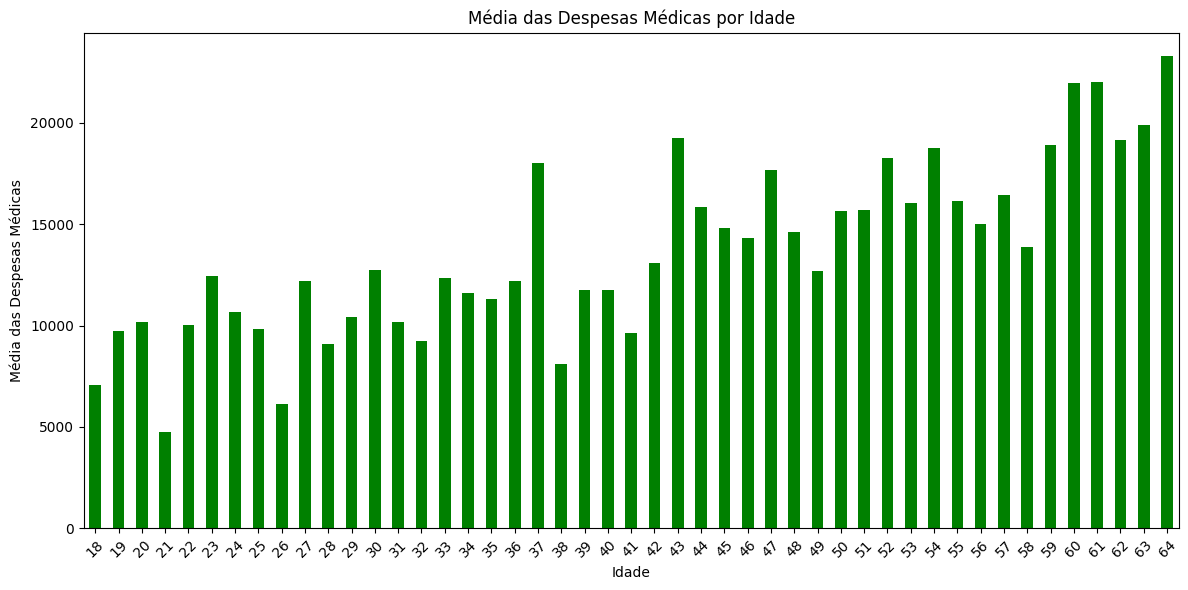

In [144]:

# Calcular a média das despesas médicas por idade
media_despesa_por_idade = data.groupby('age')['charges'].mean()

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
media_despesa_por_idade.plot(kind='bar', color='green')
plt.title('Média das Despesas Médicas por Idade')
plt.xlabel('Idade')
plt.ylabel('Média das Despesas Médicas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Média das Despesas para Fumantes: 32050.23
Média das Despesas para Não Fumantes: 8434.27


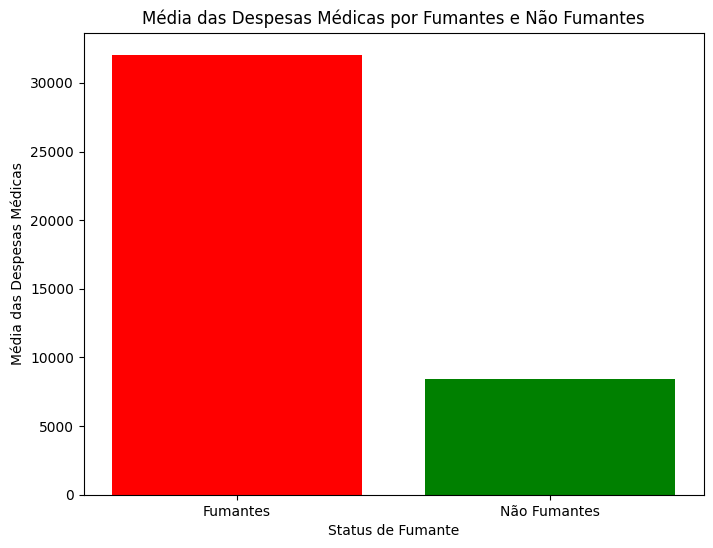

In [145]:
#Verificar se o hábito de fumar está associado a um aumento significativo nas despesas médicas.

# Calcular a média das despesas médicas para fumantes e não fumantes
media_despesa_fumantes = data[data['smoker'] == 'yes']['charges'].mean()
media_despesa_nao_fumantes = data[data['smoker'] == 'no']['charges'].mean()

# Exibir os resultados
print(f"Média das Despesas para Fumantes: {media_despesa_fumantes:.2f}")
print(f"Média das Despesas para Não Fumantes: {media_despesa_nao_fumantes:.2f}")

# Criar um gráfico de barras comparando médias de despesas entre fumantes e não fumantes
media_despesas = [media_despesa_fumantes, media_despesa_nao_fumantes]
labels = ['Fumantes', 'Não Fumantes']

plt.figure(figsize=(8, 6))
plt.bar(labels, media_despesas, color=['red', 'green'])
plt.title('Média das Despesas Médicas por Fumantes e Não Fumantes')
plt.xlabel('Status de Fumante')
plt.ylabel('Média das Despesas Médicas')
plt.show()

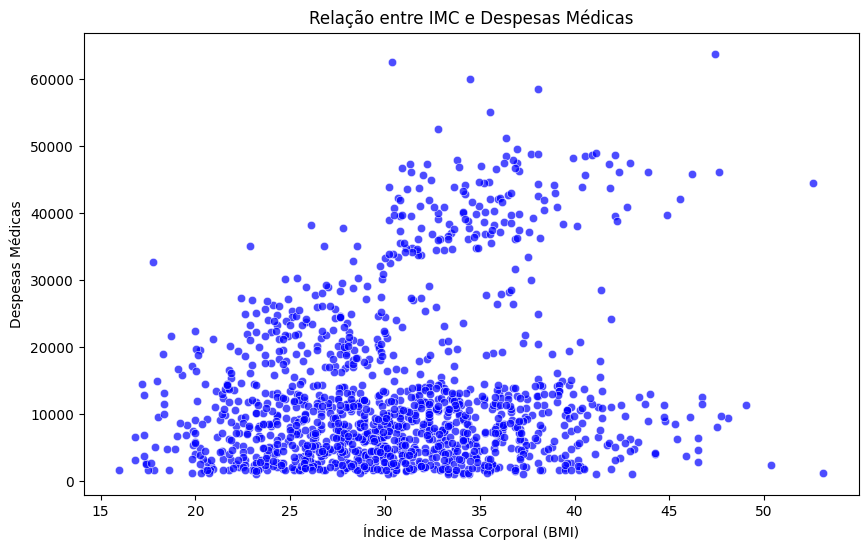

Correlação entre IMC e Despesas Médicas: 0.20


In [146]:
# Calcular a correlação entre BMI e despesas médicas
correlacao = data['bmi'].corr(data['charges'])

# Criar um gráfico de dispersão para visualizar a relação entre IMC e despesas médicas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', color='blue', alpha=0.7)
plt.title('Relação entre IMC e Despesas Médicas')
plt.xlabel('Índice de Massa Corporal (BMI)')
plt.ylabel('Despesas Médicas')
plt.show()

# Exibir a correlação calculada
print(f"Correlação entre IMC e Despesas Médicas: {correlacao:.2f}")

<h1> 3 - Tratamento dos dados </h1>

Os dados são pré-processados nesta seção. Variáveis categóricas como "sex", "smoker" e "region" são codificadas usando o Label Encoder para transformá-las em valores numéricos. Além disso, a variável "bmi" é normalizada usando o Min-Max Scaler.

In [147]:

# Codificar variáveis categóricas com Label Encoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])


In [148]:
# Visualizar o dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [149]:
#Normalização dos dados

scaler = MinMaxScaler()
data['bmi'] = scaler.fit_transform(data[['bmi']])


In [150]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,0.321227,0,1,3,16884.92400
1,18,1,0.479150,1,0,2,1725.55230
2,28,1,0.458434,3,0,2,4449.46200
3,33,1,0.181464,0,0,1,21984.47061
4,32,1,0.347592,0,0,1,3866.85520


<h1> 4 - Criação e avaliação dos modelos </h1>

Nesta parte do código, os dados são divididos em conjuntos de treinamento e teste. Três modelos de regressão são inicializados: Regressão Linear, Random Forest Regressor e Gradient Boosting Regressor. Esses modelos são então treinados nos dados de treinamento e usados para fazer previsões nos dados de teste.

Métricas de desempenho, como Mean Squared Error (MSE) e R-squared (R²), são calculadas para cada modelo. Essas métricas são armazenadas em um DataFrame para posterior análise. O modelo com o menor MSE é identificado como o melhor modelo.

In [151]:

# Dividir os dados onde charges será a despesa a prever.
X = data[['sex','smoker','region','bmi','children','age']]
y = data['charges']


In [152]:
# Dividir em conjuntos de treinamento e teste
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle = True, test_size = 0.2,random_state = 42)


In [153]:

# Inicializar modelos
linear_model = LinearRegression() 
rf_model = RandomForestRegressor() 
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Adicionamos o Gradient Boosting

# Treinar modelos
linear_model.fit(X_train, y_train)  # Treina o modelo de regressão linear
rf_model.fit(X_train, y_train)  # Treina o modelo de regressão random forest
gb_model.fit(X_train, y_train)  # Treina o modelo de Gradient Boosting

# Prever valores
linear_preds = linear_model.predict(X_test)  # Faz previsões usando o modelo de regressão linear
rf_preds = rf_model.predict(X_test)  # Faz previsões usando o modelo de regressão random forest
gb_preds = gb_model.predict(X_test)  # Faz previsões usando o modelo de Gradient Boosting


In [154]:
#Calcular as métricas dos modelos



# Calcular o MSE para o modelo de regressão linear
linear_mse = mean_squared_error(y_test, linear_preds)

# Calcular o R² para o modelo de regressão linear
linear_r2 = r2_score(y_test, linear_preds)

# Calcular o MSE para o modelo de regressão Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)

# Calcular o R² para o modelo de regressão Random Forest
rf_r2 = r2_score(y_test, rf_preds)

# Calcular o MSE para o modelo de Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_preds)

# Calcular o R² para o modelo de Gradient Boosting
gb_r2 = r2_score(y_test, gb_preds)



In [155]:
# Gerar métricas de avaliação do modelo

# Métricas MSE e R² para cada modelo
mse_scores = [linear_mse, rf_mse, gb_mse]
r2_scores = [linear_r2, rf_r2, gb_r2]

# Nomes dos modelos
nomes_modelos = ['Regressão Linear', 'Random Forest', 'Gradient Boosting']

# Criar um DataFrame com as métricas
metricas_df = pd.DataFrame({'Modelo': nomes_modelos, 'MSE': mse_scores, 'R²': r2_scores})

# Encontrar o melhor modelo com base no menor MSE
melhor_modelo = metricas_df.loc[metricas_df['MSE'].idxmin(), 'Modelo']

# Adicionar uma coluna "Melhor Desempenho"
metricas_df['Melhor Desempenho'] = metricas_df['Modelo'] == melhor_modelo

# Estilizar a tabela para destacar o melhor modelo
def highlight_best(s):
    return ['background-color: yellow' if v else '' for v in s]

metricas_df.style.apply(highlight_best, subset=['Melhor Desempenho'])

# Exibir o DataFrame
metricas_df.head()

,Modelo,MSE,R²,Melhor Desempenho
0,Regressão Linear,3.363521e+07,0.783346,False
1,Random Forest,2.093341e+07,0.865162,False
2,Gradient Boosting,1.894134e+07,0.877994,True


<h3> Hiperparâmetros do Modelo </h3>

Nesta seção, é realizada uma busca aleatória de hiperparâmetros para otimizar o modelo Gradient Boosting Regressor. São definidas distribuições possíveis de valores para hiperparâmetros como o número de estimadores, taxa de aprendizado e profundidade máxima da árvore. Em seguida, um objeto RandomizedSearchCV é usado para encontrar os melhores hiperparâmetros com base no MSE.

O modelo Gradient Boosting Regressor com os melhores hiperparâmetros é treinado e avaliado usando os dados de teste.

In [156]:
#Hiperparâmetros do Modelo


# Definir uma distribuição de valores possíveis para cada hiperparâmetro
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


# Criar um objeto RandomizedSearchCV para realizar a busca aleatória
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Ajustar o modelo aos seus dados
random_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros encontrados
melhor_param = random_search.best_params_
print("Melhores hiperparâmetros encontrados:", melhor_param)

# Obter modelo com os melhores hiperparâmetros
melhor_gb_model = random_search.best_estimator_

# Avaliar o modelo com os melhores hiperparâmetros
y_pred = melhor_gb_model.predict(X_test)

Melhores hiperparâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 107}


In [157]:
# Usar os melhores hiperparâmetros encontrados
melhor_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 107}

# Criar o modelo de Gradient Boosting com os melhores hiperparâmetros
melhor_gb_model = GradientBoostingRegressor(**melhor_params)

# Treinar o modelo com os dados de treinamento
melhor_gb_model.fit(X_train, y_train)

# Fazer previsões com o modelo otimizado
y_pred = melhor_gb_model.predict(X_test)

In [158]:
# Fazer previsões com o modelo otimizado nos dados de teste
melhor_gb_preds = melhor_gb_model.predict(X_test)

# Calcular o MSE para o modelo otimizado
melhor_gb_mse = mean_squared_error(y_test, melhor_gb_preds)

# Calcular o R² para o modelo otimizado
melhor_gb_r2 = r2_score(y_test, melhor_gb_preds)

# Imprimir as métricas
print(f'MSE para o modelo otimizado: {melhor_gb_mse}')
print(f'R² para o modelo otimizado: {melhor_gb_r2}')

MSE para o modelo otimizado: 18937607.804083135
R² para o modelo otimizado: 0.8780176325943982


<h3> Desnormalizar </h3>

Aqui desnormaliza a variável "bmi". Isso significa que os valores de "bmi" que foram normalizados anteriormente são revertidos para seus valores originais usando os valores mínimos e máximos originais usados na normalização.

In [159]:
#Desnormalizar a variável bmi

# Valores mínimos e máximos originais usados para normalização
min_bmi = scaler.data_min_[0]
max_bmi = scaler.data_max_[0]



<h3> Exportar modelo </h3>

Aqui o modelo é exportado em formato pkl, para ser utilizado posteriormente

In [160]:
import pickle

# Salve o modelo em um arquivo PKL
with open('melhor_gb_model.pkl', 'wb') as file:
    pickle.dump(melhor_gb_model, file)



<H1> APP </H1>

Cria uma aplicação web usando o framework Flask. Essa aplicação web permite aos usuários prever custos médicos com base em informações pessoais fornecidas por meio de um formulário web.

In [161]:
from flask import Flask, request, render_template
import numpy as np
import pickle

# Carregue o modelo a partir do arquivo PKL
with open('best_gb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Função para desnormalizar o IMC (bmi)
def desnormalize_bmi(normalized_bmi):
    return normalized_bmi * (max_bmi - min_bmi) + min_bmi

# Inicialize o aplicativo Flask
app = Flask(__name__)

# Rota para a página inicial com o formulário
@app.route('/', methods=['GET', 'POST'])
def index():
    previsao = None
    error_message = None

    if request.method == 'POST':
        try:
            idade = int(request.form['idade'])
            sexo = request.form['sexo']
            imc_normalized = float(request.form['imc'])
            filhos_input = request.form['filhos']
            
            # Verificar se o campo "Número de filhos" não está vazio e, em seguida, convertê-lo para um número inteiro
            if filhos_input.strip():  # Verifica se não está vazio
                filhos = int(filhos_input)
            else:
                filhos = 0
            
            fumante = request.form['fumante']
            regiao = request.form['regiao']

            # Verificar se todos os campos obrigatórios foram preenchidos
            if not idade or not sexo or not imc_normalized or not fumante or not regiao:
                raise ValueError("Todos os campos são obrigatórios.")

            # Verificar se os valores numéricos são válidos (adicione mais validações, se necessário)
            if idade < 0 or imc_normalized < 0 or filhos < 0:
                raise ValueError("Valores numéricos inválidos.")
            
            sexo_encoded = 0 if sexo == 'female' else 1
            fumante_encoded = 1 if fumante == 'yes' else 0
            regiao_encoded = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}.get(regiao, -1)

            # Verificar se o valor da região foi mapeado corretamente
            if regiao_encoded == -1:
                raise ValueError("Região inválida.")

            # Desnormalize o IMC (bmi) antes de fazer a previsão
            imc = desnormalize_bmi(imc_normalized)

            dados_de_entrada = [idade, sexo_encoded, imc, filhos, fumante_encoded, regiao_encoded]

            previsao = loaded_model.predict([dados_de_entrada])[0]
        except Exception as e:
            error_message = str(e)

    return render_template('index.html', previsao=previsao, error_message=error_message)

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


127.0.0.1 - - [23/Sep/2023 10:59:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Sep/2023 10:59:32] "GET /favicon.ico HTTP/1.1" 404 -
c:\Users\AENeto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [23/Sep/2023 10:59:49] "POST / HTTP/1.1" 200 -
